## Graduation paper solution visualisations

In [1]:
import numpy as np
from matplotlib import pyplot as plt
fact = np.math.factorial

In [2]:
%run ./special_functions.ipynb

In [3]:
N = 30 #number of terms in the 'infinite' series

### Fixed and freed rods' reaction to a longitudinal force
Flexible rod reaction to a force $f(x)=e^{\alpha x} \cos{\beta x}$.

In [4]:
def I(z0, t, alpha, beta):
    return np.sqrt(alpha**2+beta**2)*((beta*np.sin(beta*(t-z0))-
                                        alpha*np.cos(beta*(t-z0)))*np.exp(-alpha*(t-z0))+alpha) if t > z0 else 0

# перемещение для закрепленного стержня
def u_fixed(eta, t, params):
    global N
    res = 0
    for n in range(N):
        res += (-1)**n*(I(2*n+1-eta,t,*params) - I(2*n+1+eta,t,*params))
    return -res

# перемещение для свободного стержня
def u_freed(eta, t, params):
    global N
    res = 0
    for n in range(N):
        res += I(2*n+1-eta,t,*params) + I(2*n+1+eta,t,*params)
    return -res

### Flexible rod reaction to a rigid body collision (both fixed and freed)

In [5]:
# antiderivative of e^-x * L_k(2x)
def G(x,k):
    res = 0
    for i in range(k+1):
        for j in range(i+1):
            res += (-1)**(i+1)*fact(k)/(fact(i)*fact(k-i)*fact(i-j))* 2**i * x**(i-j)
    return res*np.exp(-x)

def I_hit(z0, t, k, params):
    alpha = params
    # this if statement imitates multiplication by sigma(t-z0)
    return 1/alpha*(G(alpha*(t-z0),k)+(-1)**k) if t > z0 else 0 

# перемещение для закрепленного стержня под действием удара твердого тела
def u_hit_fixed(eta, t, params):
    global N
    res = 0
    for n in range(N):
        res += I_hit(2*n+1-eta,t,n,params) - I_hit(2*n+1+eta,t,n,params)
    return -res

def u_hit_freed(eta, t, params):
    global N
    res = 0
    for n in range(N):
        res += (I_hit(2*n+1-eta,t,n,params) + I_hit(2*n+1+eta,t,n,params))*(-1)**n
    return -res

### The first zero of a longitudinal force

In [6]:
from scipy.misc import derivative

# force at the end of the rod at moment tau
def N_at_the_end(tau, params):
    return derivative(u_hit_freed, 1, args=(tau, params))

# time at which the force has a first zero
def tau_star(const):
    from scipy.optimize import fsolve
    return fsolve(N_at_the_end, 1, args=(const))[0]

 Run the cell below to load the following functions:
 - numerical solution to a fixed rod rigid body collision problem
 - data serialization

In [7]:
# %run ./other_functions.ipynb

### Visualisation

# 'main.py'

In [8]:
tau = np.linspace(0, 10, 501)
# tau = np.linspace(0, 20, 1001) # update tau to larger interval

In [9]:
#----Ext Force f(t)=exp(-2t), fixed rod:
if True:
    etas = [1,0.5,0.2,0.1]
    params = (2,0)
    fixed_analytical_damp = solve(u_fixed, etas, tau, params)

#----Ext Force f(t)=exp(-t)*cos(2pi*t), fixed rod:
if False:
    etas = [1,0.5]
    params = (1,2*np.pi)
    fixed_analytical_osc = solve(u_fixed, etas, tau, params)

#----Ext Force f(t)=exp(-3t), freed rod:
if False:
    etas = [1,0.5,0.1]
    params = (3,0)
    freed_analytical = solve(u_freed, etas, tau, params)

#----Rigid body collision, fixed rod (alpha=1)
if False:
    etas = [1, 0.8, 0.5, 0.1]
    alpha = 1
    hit_analytical_fixed = solve(u_hit_fixed, etas, tau, params=alpha)

#----Rigid body collision, freed rod (alpha=1)
if False:
    etas = [1, 0.5, 0.1]
    alpha = 1
    hit_analytical_freed = solve(u_hit_freed, etas, tau, params=alpha)

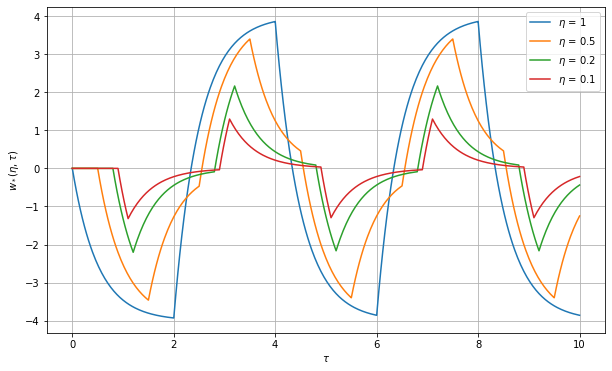

In [10]:
plot_results(tau, fixed_analytical_damp, etas, figname=None, 
             lgd=r'$\eta$', xl=r'$\tau$', yl=r'$w_*(\eta,\tau)$', title=None)

## First zero

In [11]:
u_hit_freed_border_PRIME = np.array([np.array([N_at_the_end(t, params=a) 
                                               for t in tau]) 
                                     for a in [0.5,1,2]])

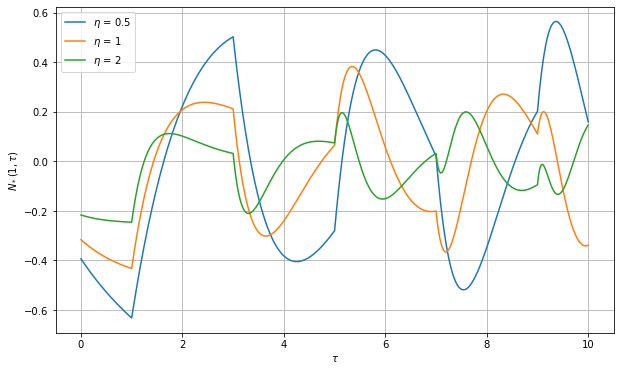

In [14]:
plot_results(tau, u_hit_freed_border_PRIME, [0.5,1,2], figname=None, lgd=None,
             yl=r'$N_*(1,\tau)$', xl=r'$\tau$', title=None)

In [13]:
tau_star(const=1)

1.4323323583816934